In [1]:
import pandas as pd
import numpy as np

In [2]:
df_black_friday = pd.read_csv("train.csv")


In [3]:
df_black_friday.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
df_black_friday.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df_black_friday[['Product_Category_2']].value_counts().reset_index()


,Product_Category_2,count
0,8.0,64088
1,14.0,55108
2,2.0,49217
3,16.0,43255
4,15.0,37855
5,5.0,26235
6,4.0,25677
7,6.0,16466
8,11.0,14134
9,17.0,13320


In [6]:
df_black_friday[['Product_Category_3']].value_counts().reset_index()


,Product_Category_3,count
0,16.0,32636
1,15.0,28013
2,14.0,18428
3,17.0,16702
4,5.0,16658
5,8.0,12562
6,9.0,11579
7,12.0,9246
8,13.0,5459
9,6.0,4890


In [7]:
df_black_friday[['Product_Category_1']].value_counts().reset_index()


,Product_Category_1,count
0,5,150933
1,1,140378
2,8,113925
3,11,24287
4,2,23864
5,6,20466
6,3,20213
7,4,11753
8,16,9828
9,15,6290


# 📘 Black Friday Purchase Prediction using Linear & Random Forest Regression

El objetivo de este proyecto es **predecir el monto de compra (`Purchase`) durante el evento Black Friday**, utilizando dos enfoques de Machine Learning:
- **Regresión Lineal:** para establecer una relación base simple.
- **Random Forest Regressor:** para capturar relaciones no lineales complejas.

---


## 🔹 1. Importación de librerías
Importamos las librerías necesarias para:
- Manipular datos (`pandas`, `numpy`)
- Visualizar resultados (`matplotlib`, `seaborn`)
- Preprocesar datos (`LabelEncoder`, `StandardScaler`)
- Entrenar modelos (`LinearRegression`, `RandomForestRegressor`)
- Evaluar resultados (`mean_absolute_error`, `r2_score`)


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## 🔹 2. Carga de datos
Aquí cargamos el dataset de Black Friday y mostramos:
- Estructura general (columnas, tipos de datos)
- Primeras filas para entender el contenido

Esto nos permite tener una visión inicial del dataset y de qué tipo de variables vamos a trabajar.


In [15]:
# df_black_friday = pd.read_csv('BlackFriday.csv')  # Descomentar con la ruta correcta
print(df_black_friday.info())
print(df_black_friday.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 50.4+ MB
None
   User_I

## 🔹 3. Análisis inicial
Revisamos:
- Valores nulos por columna.
- Distribución de las categorías de producto.

Esto nos ayuda a detectar datos faltantes y entender las características de compra.


In [16]:
print(df_black_friday.isnull().sum())

for col in ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']:
    print(f"\nDistribución de {col}:")
    print(df_black_friday[col].value_counts().head())


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

Distribución de Product_Category_1:
Product_Category_1
5     150933
1     140378
8     113925
11     24287
2      23864
Name: count, dtype: int64

Distribución de Product_Category_2:
Product_Category_2
8.0     237726
14.0     55108
2.0      49217
16.0     43255
15.0     37855
Name: count, dtype: int64

Distribución de Product_Category_3:
Product_Category_3
16.0    415883
15.0     28013
14.0     18428
17.0     16702
5.0      16658
Name: count, dtype: int64


## 🔹 4. Imputación de valores nulos
Usamos la **moda (valor más frecuente)** para reemplazar valores faltantes en las columnas de categoría de producto.  
Esto evita eliminar filas y mantiene la integridad del dataset.


In [17]:
for col in ['Product_Category_2', 'Product_Category_3']:
    moda = df_black_friday[col].mode()[0]
    df_black_friday[col] = df_black_friday[col].fillna(moda)


## 🔹 5. Codificación de variables categóricas
Convertimos las variables categóricas (`Gender`, `Age`, etc.) en valores numéricos usando **LabelEncoder**,  
ya que los algoritmos de Machine Learning no pueden procesar texto directamente.


In [18]:
le = LabelEncoder()
for col in ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']:
    df_black_friday[col] = le.fit_transform(df_black_friday[col])


## 🔹 6. División entre variables predictoras y objetivo
Separamos las variables independientes (X) del objetivo (y):
- `X`: todas las columnas que influyen en la compra.
- `y`: columna `Purchase` (monto de compra a predecir).


In [19]:
X = df_black_friday.drop(['User_ID', 'Product_ID', 'Purchase'], axis=1)
y = df_black_friday['Purchase']


## 🔹 7. Escalado de variables
Estandarizamos las variables para que todas tengan la misma escala,  
lo cual mejora el rendimiento de modelos basados en distancia o coeficientes.


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 🔹 8. División en conjuntos de entrenamiento y prueba
Dividimos los datos:
- 80% para entrenamiento
- 20% para prueba  
Esto permite evaluar el desempeño real del modelo con datos nuevos.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



## 🔹 9. Modelo 1: Regresión Lineal
Entrenamos un modelo lineal simple para establecer una **línea base**.  
Calculamos métricas de error y determinación:
- MAE (Error absoluto medio)
- RMSE (Raíz del error cuadrático medio)
- R² (porcentaje de variabilidad explicada)


In [22]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n--- Métricas: Regresión Lineal ---")
print(f"MAE : {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²  : {r2_lr:.3f}")



--- Métricas: Regresión Lineal ---
MAE : 3576.62
RMSE: 4675.18
R²  : 0.130


## 🔹 10. Visualización de la regresión lineal
Mostramos un gráfico de dispersión entre los valores reales y predichos  
para observar la precisión del modelo lineal.


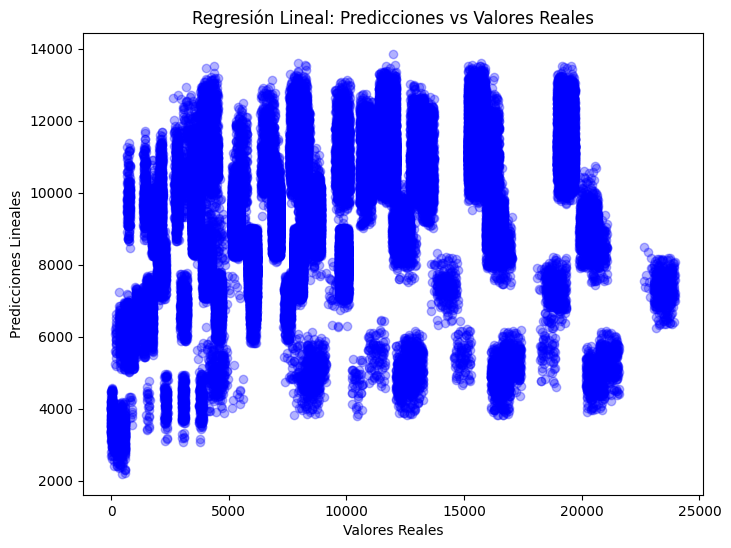

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, alpha=0.3, color='blue')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones Lineales')
plt.title('Regresión Lineal: Predicciones vs Valores Reales')
plt.show()


## 🔹 11. Modelo 2: Random Forest Regressor
Entrenamos un modelo de **bosques aleatorios**, que combina muchos árboles de decisión.  
Este modelo captura relaciones no lineales y suele ofrecer mejor rendimiento.


In [25]:
model_rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Métricas: Random Forest ---")
print(f"MAE : {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²  : {r2_rf:.3f}")



--- Métricas: Random Forest ---
MAE : 2220.42
RMSE: 3049.83
R²  : 0.630


## 🔹 12. Comparación visual entre modelos
Comparamos ambas técnicas en cuanto a error y rendimiento (MAE, RMSE, R²).
Esto nos permite identificar cuál modelo generaliza mejor.



Comparación de modelos:
             Modelo          MAE         RMSE        R²
0  Regresión Lineal  3576.619390  4675.181947  0.130098
1     Random Forest  2220.424583  3049.827942  0.629810


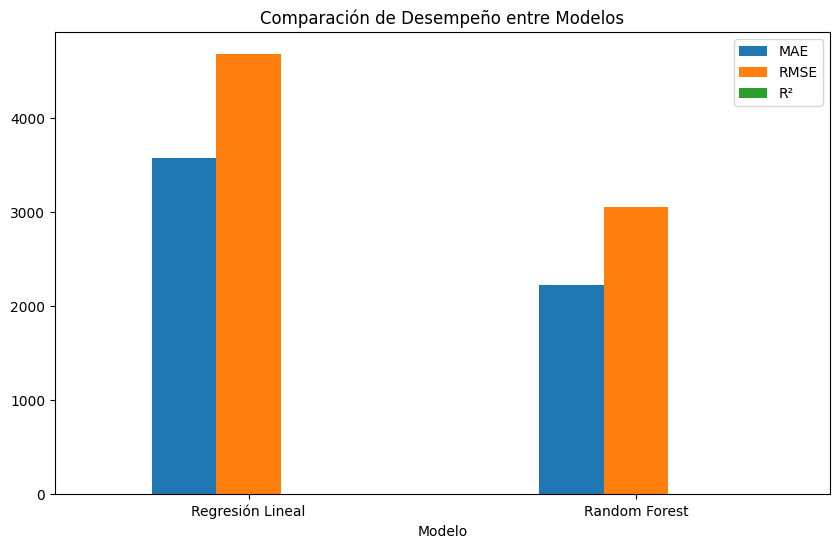

In [27]:
metrics_df = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R²': [r2_lr, r2_rf]
})

print("\nComparación de modelos:")
print(metrics_df)

metrics_df.plot(x='Modelo', y=['MAE', 'RMSE', 'R²'], kind='bar', figsize=(10,6))
plt.title('Comparación de Desempeño entre Modelos')
plt.xticks(rotation=0)
plt.show()


## 🔹 13. Importancia de variables
Analizamos cuáles variables influyen más en las predicciones.  
Esto es útil para estrategias de **marketing y segmentación de clientes**.



--- Top 10 Variables más importantes ---
                     Variable  Importancia
6          Product_Category_1     0.780379
2                  Occupation     0.058478
4  Stay_In_Current_City_Years     0.040895
1                         Age     0.036123
7          Product_Category_2     0.025727
8          Product_Category_3     0.016612
5              Marital_Status     0.015594
3               City_Category     0.013964
0                      Gender     0.012228


/var/folders/xc/3_cjp1s510x0dbkmyhkkvf8c0000gn/T/ipykernel_95432/101573184.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importancia', y='Variable', palette='viridis')


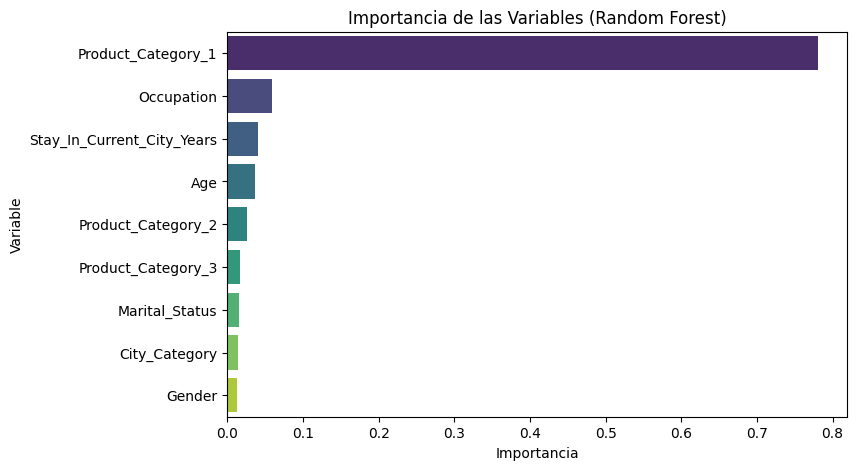

In [28]:
importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': model_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\n--- Top 10 Variables más importantes ---")
print(importance_df.head(10))

plt.figure(figsize=(8,5))
sns.barplot(data=importance_df.head(10), x='Importancia', y='Variable', palette='viridis')
plt.title('Importancia de las Variables (Random Forest)')
plt.show()


## 🔹 Validación cruzada (Cross-Validation)

La **validación cruzada (k-fold)** es una técnica para evaluar la estabilidad y capacidad de generalización de un modelo.  
En lugar de dividir el dataset una sola vez entre entrenamiento y prueba, se hacen **múltiples divisiones (folds)**.

### ¿Por qué hacerlo?
- Evita depender de una sola partición de los datos.
- Permite evaluar la **consistencia del modelo** en diferentes subconjuntos.
- Reduce el riesgo de sobreajuste (**overfitting**).

### ¿Qué se hace aquí?
- Se usa la función `cross_val_score()` de `sklearn.model_selection`.
- Se entrena y evalúa el modelo de Random Forest **5 veces** (`cv=5`).
- Se calcula el **R² promedio**, que indica cuánta variabilidad explica el modelo en promedio entre las iteraciones.

### ¿Qué se logra?
Obtenemos una medida más confiable del desempeño real del modelo, validando que su rendimiento no depende de una única división de los datos.


In [29]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_rf, X_scaled, y, cv=5, scoring='r2')
print('R² promedio en validación cruzada:', scores.mean())


R² promedio en validación cruzada: 0.6323693341534462


## 🔹 Conclusión de la validación cruzada

El resultado obtenido de **R² promedio = 0.632** confirma que el modelo de **Random Forest Regressor** mantiene un desempeño **consistente y generalizable** a través de diferentes subconjuntos de datos.

Esto significa que:

- El modelo explica en promedio **el 63% de la variabilidad del monto de compra**, independientemente de cómo se dividan los datos.
- No hay indicios de **sobreajuste**, ya que el rendimiento promedio es muy similar al R² obtenido en la evaluación inicial (≈0.63).
- El modelo demuestra ser **estable y robusto**, lo que lo hace adecuado para predecir el comportamiento de gasto de nuevos clientes.

En términos prácticos, esto indica que el modelo puede ser utilizado con confianza para estimar el monto de compra de futuros compradores durante eventos similares al Black Friday.


## 🔹 Optimización del modelo con Grid Search

La **búsqueda en malla (Grid Search)** es una técnica sistemática para encontrar la **mejor combinación de hiperparámetros** en un modelo de Machine Learning.

### 🎯 ¿Por qué se hace?
Aunque el modelo de **Random Forest** ya ofrece buen rendimiento, su desempeño depende de ciertos **hiperparámetros** (por ejemplo, número de árboles, profundidad máxima, tamaño mínimo de hojas, etc.).  
Probar diferentes combinaciones manualmente sería ineficiente, así que usamos `GridSearchCV` para automatizar este proceso.

### ⚙️ ¿Qué se hace aquí?
1. Se define un **diccionario de parámetros** (`params`) con los valores posibles para cada hiperparámetro:
   - `n_estimators`: número de árboles del bosque.
   - `max_depth`: profundidad máxima de cada árbol (controla la complejidad).
   - `min_samples_split`: número mínimo de muestras para dividir un nodo.
   - `min_samples_leaf`: número mínimo de muestras que debe tener una hoja.
2. `GridSearchCV` entrena múltiples modelos con todas las combinaciones posibles.
3. Evalúa cada modelo usando **validación cruzada (cv=3)**.
4. Selecciona los parámetros con **mejor R² promedio**.

### 📈 ¿Qué se logra?
- Encontrar la configuración más eficiente para el modelo.
- Reducir **sobreajuste** y mejorar **rendimiento general**.
- Obtener un modelo más preciso y estable, listo para producción.

Una vez ejecutado, se muestran:
- `best_params_`: los mejores hiperparámetros encontrados.
- `best_score_`: el valor de R² promedio alcanzado con esa configuración.


In [30]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1),
                    params, cv=3, scoring='r2', verbose=2)
grid.fit(X_train, y_train)

print('Mejores parámetros:', grid.best_params_)
print('Mejor R²:', grid.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  14.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  15.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  13.4s
[CV] END max_depth=10, min_sa

## 🔹 Resultados del Grid Search

Tras 50 minutos de entrenamiento exhaustivo, el proceso de **búsqueda en malla (GridSearchCV)** finalizó exitosamente probando 81 combinaciones de hiperparámetros con validación cruzada de 3 particiones.

### ⚙️ Mejores hiperparámetros encontrados:
```python
{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
